<img align="right" style="max-width: 200px; height: auto" src="./fs_logo.png">

##  Lab 03 - Unsupervised Machine Learning

Seminar Künstliche Intelligenz, Frankfurt School, 2024

Die Analysen des Seminars **Künstliche Intelligenz** des Zertifikatstudiengangs **Certified Audit Data Scientist (CADS)** basieren auf Jupyter Notebook. Anhand solcher Notebooks ist es möglich eine Vielzahl von Datenanalysen und statistischen Validierungen durchzuführen.

<img align="center" style="max-width: 700px" src="./lab_03_banner.png">

Im letzten Lab haben Sie die verschiedenen Elemente eines Supervised Machine Learning Workflow kennengelernt z.B. Datenaufbereitung, Model Training und Validierung. In diesem dritten Lab werden wir unseren ersten **Unsupervised Machine Learning** Workflow mit dem in der Vorlesung vorgestellten **k Means-Clustering)** Algorithmus erstellen. Wir werden dieses Verfahren für das Clustern von nicht gelabelten Daten (d.h. von Daten ohne definierte Kategorien oder Gruppen) verwenden. 

Der **k-Means-Clustering**-Algorithmus ist einer der beliebtesten Clustering-Algorithmen des maschinellen Lernen's. Die Zielsetzung des k-Means Clustering ist es, Cluster (Gruppen) in einem gegebenen Datensatz zu finden. Das Verfahren kann dazu verwendet werden Hypothesen über die innerhalb eines Datensatzes **vorhandenen Gruppen zu verfizieren**. Darüber hinaus findet das Verfahren oftmals Anwendung bei der **Identifizierung unbekannter Gruppen** in komplexen Datensätzen. Einige Beispiele für geschäftsbezogene Anwendungsfälle sind:

>- Segmentierung von Kunden nach Kaufhistorie.
>- Segmentierung von Benutzern nach Verhalten auf einer Webseite.
>- Gruppieren von Beständen nach Verkaufsaktivitäten.
>- Gruppieren von Beständen nach Fertigungsmetriken.

(Quelle: https://www.datascience.com/blog/k-means-clustering)

Wir werden den **k Means-Clustering** Algorithmus dazu verwenden, um zu lernen, Beobachtungen des **Iris Datensatzes** zu gruppieren. Die folgende Abbildung zeigt einen Überblick über den Prozess des maschinellen Lernens, welchen wir in diesem Notebook erstellen:

<img align="center" style="max-width: 900px; height: auto" src="./splash.png">

Bei etwaigen Fragen wenden Sie sich, wie immer gerne an uns via **marco (dot) schreyer (at) efk (dot) admin (dot) ch**. Wir wünschen Ihnen Viel Freude mit unseren Notebooks und Ihren revisorischen Analysen!

## Lernziele des Labs:

Nach der heutigen Übung sollten Sie in der Lage sein:

> 1. Den **Unsupervised Machine Learning** Workflow in Form eines Notebook zu erstellen.
> 2. Den **k-Means Clustering** Algorithmus zu trainieren und zu evaluieren. 
> 3. Die Python **sklearn Bibliothek** zu verwenden, um beliebige Clustering Verfahren zu trainieren bzw. zu optimieren.
> 4. Die nahezu **optimale Anzahl von Clustern** für einen unbekannten Datensatz zu ermitteln. 
> 5. Die **gewonnenen Ergebnisse** eines Clustering auszuwerten und zu interpretieren.

## 1. Einrichten der Analyseumgebung

Ähnlich wie in den vorangegangenen Übungen müssen wir eine Reihe von Python-Bibliotheken importieren, die Datenanalyse und -visualisierung ermöglichen. In dieser Übung werden wir die Bibliotheken `Pandas`, `Numpy`, `Scikit-Learn`, `Matplotlib` und `Seaborn` verwenden. Nachfolgend importieren wir die benötigten Bibliotheken durch die Ausführung der folgenden Anweisungen:

In [1]:
# import utility libraries
import warnings

# import the pandas data science library
import pandas as pd
import numpy as np

# import the scipy spatial distance capability
from scipy.spatial.distance import cdist

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

# import sklearn k-means classifier library
from sklearn.cluster import KMeans

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlibs 3D plotting capabilities
from mpl_toolkits.mplot3d import Axes3D

Ausschalten möglicher Warnmeldungen z.B. aufgrund von zukünftigen Änderungen der Bibliotheken:

In [2]:
warnings.filterwarnings('ignore')

Aktivieren der sog. Inline-Darstellung von Visualisierungen in Jupyter-Notebook:

In [3]:
%matplotlib inline

Verwenden des `Seaborn` Visualisierungstil's in allen nachfolgenden Visualisierungen:

In [4]:
sns.set_theme()

Festlegen eines zufälligen Seeds zur Gewährleistung der Reproduzierbarkeit:

In [5]:
random_seed = 1111

## 2. Datenakquise und Datenaufbereitung

### 2.1 Datensatz Download und Assessment

Der **Iris-Datensatz** ist ein klassischer und einfacher Datensatz, der oft als "Hello World"-Beispiel in der Mehrklassen-Klassifikation verwendet wird. Dieser Datensatz besteht aus Messungen von drei verschiedenen Arten von Irisblüten (als **Klassen** bezeichnet), nämlich der Iris Setosa, der Iris Versicolour und der Iris Virginica, und ihrer jeweiligen gemessenen Blütenblatt- und Kelchblattlänge (als **Merkmale** bezeichnet).

<img align="center" style="max-width: 700px; height: auto" src="iris_dataset.png">

(Quelle: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

Insgesamt besteht der Datensatz aus **150 Samples** (50 Samples pro Klasse) sowie den entsprechenden **4 verschiedenen Features**, die für jede Probe durchgeführt wurden. Nachfolgend, die Liste der einzelnen Features:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Further details of the dataset can be obtained from the following puplication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Laden wir nun den Datensatz und führen wir ein erstes Assessment der erhaltenen Daten durch: 

In [6]:
iris = datasets.load_iris()

Ausgabe und Prüfen der Feature-Dimensionalität des Datensatzes:

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Ausgabe und Prüfen der Feature-Dimensionalität des Datensatzes:

In [8]:
iris.data.shape

(150, 4)

Ausgabe und Prüfen der Label-Dimensionalität des Datensatzes:

In [9]:
iris.target.shape

(150,)

Ausgabe und Prüfen der im Datensatz enthaltenen Klassen Labels:

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Stellen wir uns kurz vor, wie die Features des Datensatzes extrahiert wurden und innerhalb des Datensatzes dargestellt werden:

<img align="center" style="max-width: 900px; height: auto" src="featurecollection.png">

Ausgabe und Inspektion der ersten fünf Featurezeilen des Iris-Datensatzes:

In [11]:
pd.DataFrame(iris.data).head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Ausgabe und Inspektion der korrespondierenden Labels der ersten fünf Featurezeilen des Iris-Datensatzes:

In [12]:
pd.DataFrame(iris.target).head(5)

,0
0,0
1,0
2,0
3,0
4,0


Im Folgenden, führen wir nun eine eingehendere Bewertung der Daten durch. Dazu visualisieren wir die Merkmalsverteilungen des Iris-Datensatzes entsprechend ihrer jeweiligen Klassenzugehörigkeit sowie die paarweisen Beziehungen der Merkmale.

Wir verwenden die Python-Bibliothek **Seaborn**, um eine solche Visualisierung zu erstellen, die auch als **Pairplot** bezeichnet wird. Die Seaborn Bibliothek ist eine leistungsstarke Datenvisualisierungsbibliothek, die auf der Matplotlib basiert. Sie bietet eine hervorragende Schnittstelle zum Zeichnen informativer statistischer Grafiken (https://seaborn.pydata.org). 

<Figure size 1000x1000 with 0 Axes>

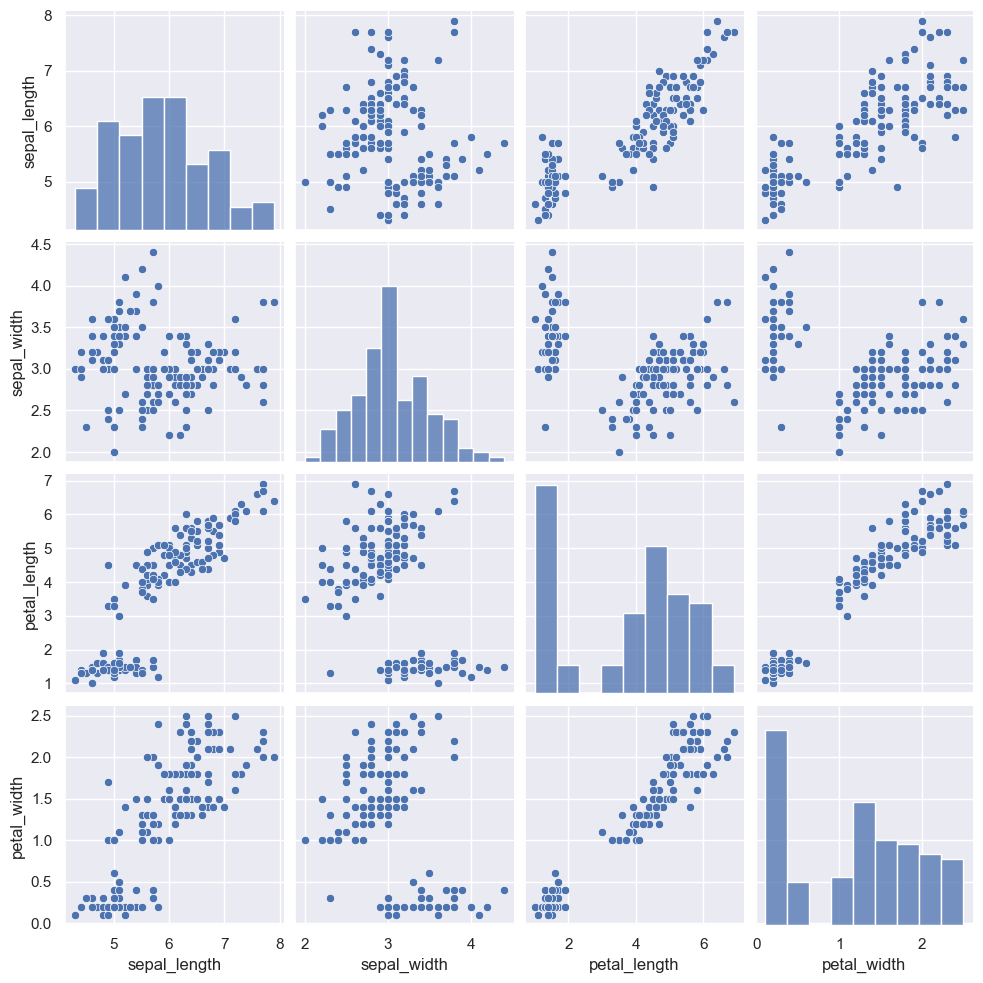

In [13]:
plt.figure(figsize=(10, 10))
iris_plot = sns.load_dataset("iris")

# supervised scenario
# sns.pairplot(iris_plot, diag_kind='hist', hue='species');

# unsupervised scenario
sns.pairplot(iris_plot, diag_kind='hist');

Aus dem erstellten Pairplot ist ersichtlich, dass die meisten Features, die der Blütenklasse `setosa` entsprechen, eine **lineare Trennbarkeit** von den Features der übrigen Blütenklassen aufweisen. Darüber hinaus weisen die Blütenklassen `versicolor` und `virginica` eine **nicht lineare Trennbarkeit** über alle gemessenen Features des Iris-Datensatzes auf.

Stellen wir uns nun vor, dass wir das Label, welches mit jeder Beobachtung im Iris-Datensatz verbunden ist, nicht wissen. Wie könnten wir die innerhalb des Datensatzes vorhandenen drei Klassen dennoch unterscheiden bzw. ableiten?

### 2.3 Feature Skalierung des Datensatz

Bei Betrachtung der Featurewerte des **Iris-Datensatzes** wird augenscheinlich, dass die jeweiligen Wertebereiche stark variieren. Dies stellt eine Herausforderung für abstandsbasierte Algorithmen wie den **k Means-Clustering** Algorithmus dar. Solche Algorithmen berechnen den Abstand zwischen zwei Samples anhand eines Abstandsmaßes wie z.B. dem **Euklidischen** oder **Manhattan** Abstand.

Weist eines dieser Merkmale einen großen Wertebereich auf, dominiert der berechnete Abstand dieses speziellen Features die Funktion des Algorithmnus. Deshalb ist es notwendig den Wertebereich der verschiedenen Features zu skalieren, z.B. auf einen Wertebereich zwischen $[0,1]$ oder $[-1,1]$. Hierdurch ist gewährleistet, dass jedes Feature gleichwertig zum Ergebnis des Algorithmus beiträgt. Ein verbreitetes Verfahren zur Skalierung von Merkmalen wird als **Min-Max-Normalisierung** bezeichnet und ist durch folgende Formel definiert:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

Skalieren wir nun die einzelnen Featurewerte des **Iris Datensatzes** anhand der **Min-Max-Normalisierung** unter Verwendung der `MinMaxScaler` Funktionalität der `sklearn` Bibliothek:

In [14]:
# init the min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# min-max normalize the distinct feature values
iris_data_norm = scaler.fit_transform(iris.data)

Ausgabe und Prüfen der ersten 5 Merkmalszeilen des normalisierten Datensatzes:

In [15]:
pd.DataFrame(iris_data_norm, columns=iris.feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Wir können nun feststellen, dass die Merkmalswerte min-max skaliert wurden. Lassen Sie uns diese Beobachtung nun auch kurz statistisch validieren, d.h. um zu prüfen ob tatsächlich alle Merkmalswerte auf einen Wertebereich zwischen $[0,1]$ skaliert wurden:

In [16]:
pd.DataFrame(iris_data_norm, columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Das Ergebnis schaut gut aus, d.h. alle Merkmalswerte liegen tatsächlich in einem Bereich zwischen $[0,1]$. Nachfolgend möchten wir das Ergebnis der neu skalierten Features auch einmal visuell analysieren:

<Figure size 1000x1000 with 0 Axes>

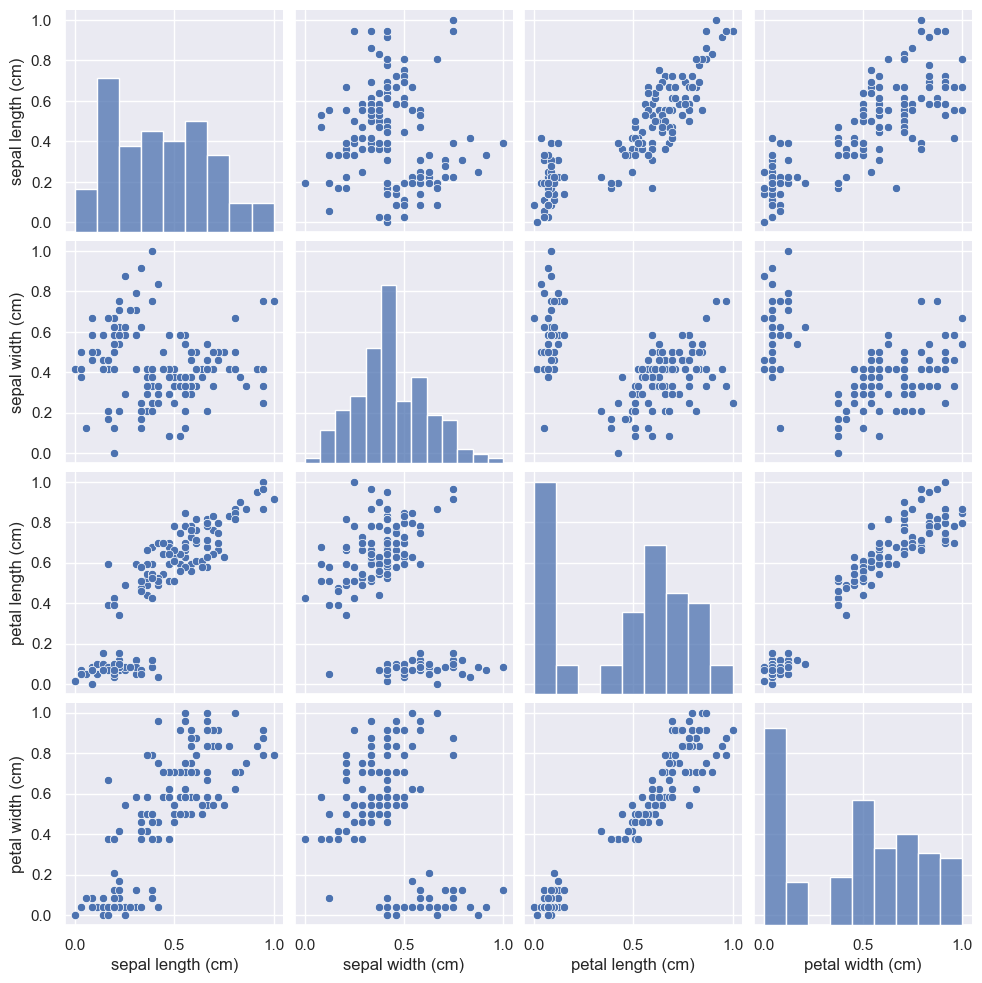

In [17]:
# init the plot
plt.figure(figsize=(10, 10))

# prepare the dataset to be plotable using seaborn

# convert to Panda's DataFrame
iris_plot = pd.DataFrame(iris_data_norm, columns=iris.feature_names)

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist');

Wunderbar, die verschiedenen Verteilungen der Merkmale blieben unverändert.

## 3. k Means-Clustering

Der **k-Means Clustering** Algorithmus ist einer der am häufigsten verwendeten unüberwachten Clustering-Algorithmen, um Cluster (Gruppen) in mehrdimensionalen Daten zu finden. Im Ergebnis liefert das Verfahren für jedes unbekannte Sample $x$ eine Clusterzugehörigkeit.

<img align="center" style="max-width: 900px; height: auto" src="kmeans_algorithm.png">

Um dieses Ziel zu erreichen geht der k-Means Clustering von den nachfolgenden beiden Annahmen aus:

- Die Zuordnung eines Samples zu einem Cluster erfolgt anhand des am nächsten gelegenen Zentroids.
- Der Zentroid (bzw. Mean) eines Clusters bezeichnet das arithmetische Mittel der zugordneten Samples.

Bevor wir den k Means-Clustering Algorithmus für das Clustering eines Datensatzes $x$ des Iris-Datensatzes anwenden schauen wir uns nochmals die einzelnen Schritte des Algorithmus an. Dabei gehen wir zunächst von folgenden Annahmen aus:

- Datensatz $D$ bestehend aus Samples $D = \{x_1, x_2, x_3, ..., x_n\} \in \mathcal{R}^d$. 
- Verschiedene $k$ Zentroiden (bzw. Means) $\mu_{1}, \mu_{2}, ..., \mu_{k} \in \mathcal{R}^d$.
- Zentroide (bzw. Means) $\mu_{i}$ eines Clusters bilden das arithmetische Mittel der zugordneten Samples.

Basierend auf diesen Annahmen ist es möglich die nachfolgenden Schritte des **k Means-Clustering** Algorithmus iterativ durchzuführen:

>- **Schritt 1** - Initialisiere $k$ Zentroide $\mu_{1}, \mu_{2}, ..., \mu_{k} \in \mathcal{R}^d$ durch eine zufällige Auswahl von $k$ Samples $x_i$.
>- **Schritt 2** - Berechne für jedes Sample $x_i$ den Abstand zu jedem Zentroid und ordne $x_i$ dem jeweils nächstgelegenen Zentroid zu.
>- **Schritt 3** - Berechne die neuen $k$ Zentroide $\mu_{1}, \mu_{2}, ..., \mu_{k} \in \mathcal{R}^d$ auf Grundlage der zugordneten Samples.
>- **Schritt 4** - Wiederhole die Schritte 2 und 3 iterativ, bis sich die Zentroide und Zuordnungen nicht mehr ändern.

### 3.1 Visualisierung des Feature Space

In einem nächsten Schritt möchten wir den k Means-Clustering Algorithmus auf den Iris-Datensatz anwenden. Wir beginnen mit einem einführenden Beispiel auf der Grundlage der beiden Features `Petal Length (cm)` und `Petal Width (cm)`. Hierzu verschaffen wir uns zunächst einen Eindruck über die Verteilung der Samples der beiden Merkmale, indem wir sie entsprechend visualisieren:

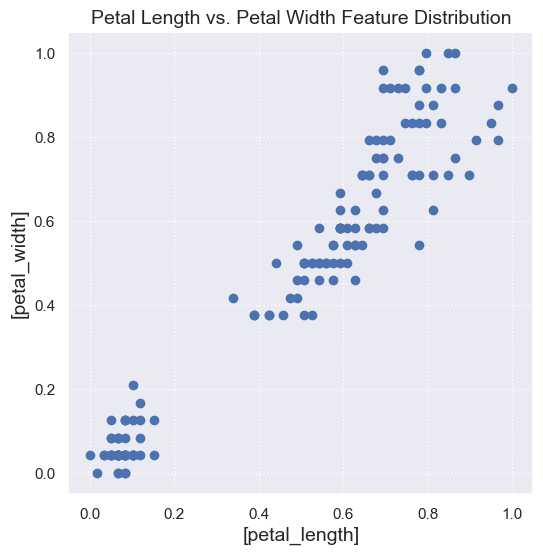

In [18]:
# init the plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot petal length (3rd feature in the dataset) vs. petal width (4th feature in the dataset)
ax.scatter(iris_data_norm[:, 2], iris_data_norm[:, 3])

# add axis legends
ax.set_xlabel("[petal_length]", fontsize=14)
ax.set_ylabel("[petal_width]", fontsize=14)

# add plot title
plt.title('Petal Length vs. Petal Width Feature Distribution', fontsize=14);

### 3.2 Hyperparameter Definition

Um den **k Means-Clustering** Algorithmus zu parametrisieren ist es zunächst notwendig die entsprechenden Hyperparameter zu definieren. Hierbei handelt es sich um Parameter, welche nicht durch das Modell im Rahmen des Training gelernt werden können.

In einem ersten Schritt definieren wir die **Anzahl der Cluster $k$**, die im Rahmen des Clustering erkannt werden sollen. Hierbei folgen wir implizit der Annahme, dass jede Iris Spezies einer uns unbekannten Verteilung entspricht (jede Verteilung mit anderem Mittelwert $\mu_1$, $\mu_2$ und $\mu_3$). Vor diesem Hintergrund setzen wir die Anzahl der zu erkennenden Cluster, entsprechend der Anzahl Iris Spezien, auf $k=3$:

In [19]:
no_clusters = 3

In einem zweite Schritt definieren wir die **initialen Koordinaten der Cluster Zentroide $\mu_{i}$**. Diese stellen die Ausgangspunkte der Zentroide in der ersten Iteration des k Means-Clustering Verfahrens dar. In unserem Beispiel unserem definieren wir insgesamt 3 Koordinaten mit jeweils 2 Dimensionen. Dies vor dem Hintergrund, dass wir 3 Cluster auf der Grundlage der beiden Features `Petal Length (cm)` und `Petal Width (cm)` finden möchten:

In [20]:
init_means = np.array([[1, 3], [2, 6], [1, 7]])

In einem dritten Schritt definieren wir eine **maximale Anzahl von Iterationen**, welche der k Means-Clustering Algorithmus durchführen soll. Im Allgemeinen ist das Clustering beendet, sobald sich keine Änderungen der Clusterzuordnung mehr ergeben. Für hochdimensionale Datenbestände ist es jedoch oftmals sinnvoll, eine Obergrenze der Iterationsschritte festzulegen:

In [21]:
max_iterations = 10

### 3.3 Model Training

Nach erfolgreicher Definition der Hyperparameter ist es nun möglich eine Instanz des **k Means-Clustering** Algorithmus mit Hilfe der `sklearn` Bibliothek zu initialisieren. Die `sklearn` Bibliothek enthält eine ausführliche Dokumentation des Algorithmus, u.a. praktische Beispiele und Anwendungsfälle, und kann unter der nachfolgenden URL abgerufen werden:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Nach Definition der Hyperparameter initialisieren nun den **k Means-Clustering** Algorithmus der [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) Bibliothek:

In [22]:
kmeans = KMeans(n_clusters=no_clusters, init=init_means, max_iter=max_iterations)

In einem nächsten Schritt, trainieren wir das Clustering auf Grundlage der Feature `Petal length (cm)` und  `Petal width (cm)` des Datensatzes:

In [23]:
kmeans.fit(iris_data_norm[:,2:4]) # note that we are using column 2 (petal length) and 3 (petal width) 

KMeans(init=array([[1, 3],
       [2, 6],
       [1, 7]]), max_iter=10,
       n_clusters=3)

Nach erfolgreichem Training, werfen wir nun einen Blick auf die gelernten Klassenlabels:

In [24]:
labels = kmeans.labels_ # obtain the assigned cluster labels
print(labels)           # print the cluster labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 2 0 2
 2 2 0 0 0 2 2 2 2 0 0 0 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Darüber hinaus möchten wir auch einen Blick die gelernten Zentroide werfen:

In [25]:
means = kmeans.cluster_centers_ # obtain the assigned cluster means 
print(means)                    # print the cluster center coordinates

[[0.69355153 0.69396552]
 [0.07830508 0.06083333]
 [0.45110821 0.40705128]]


### 3.4 Model Evaluation

In einem nächsten Schritt möchten wir nun die Güte des erlernten Modell's qualitativ und auch quantitativ evaluieren. Hierzu visualisieren wir zunächst die Samples auf Grundlage der beiden Features `Petal Length (cm)` und `Petal Width (cm)` und die Positionen der Cluster Zentriode:

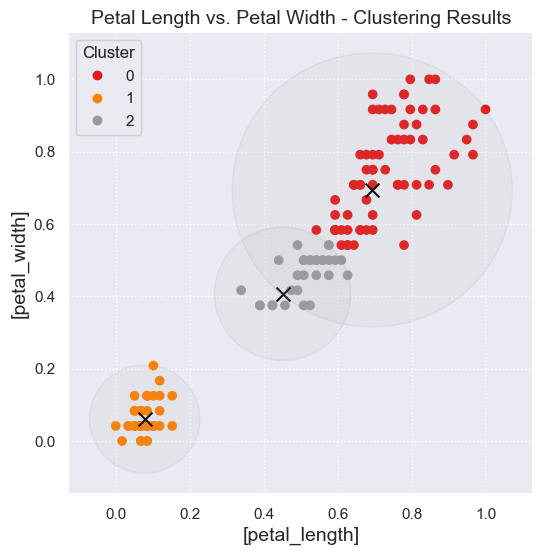

In [26]:
### init the plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot petal length vs. petal width and corresponding classes
scatter = ax.scatter(iris_data_norm[:,2], iris_data_norm[:,3], c=labels.astype(np.int32), cmap=plt.cm.Set1)

# prepare data legend
legend = ax.legend(*scatter.legend_elements(), loc='upper left', title='Cluster')

# add legend to plot
ax.add_artist(legend)

# plot cluster means
ax.scatter(means[:,0], means[:,1], marker='x', c='black', s=100)

# iterate over distinct cluster means
for i, mean in enumerate(means):
    
    # determine max cluster point distance
    cluster_radi = cdist(iris_data_norm[:, 2:4][labels==i], [mean]).max()
    
    # plot cluster size
    ax.add_patch(plt.Circle(mean, cluster_radi, fc='darkgrey', edgecolor='slategrey', lw=1, alpha=0.1, zorder=1))

# add axis legends
ax.set_xlabel("[petal_length]", fontsize=14)
ax.set_ylabel("[petal_width]", fontsize=14)

# add plot title
plt.title('Petal Length vs. Petal Width - Clustering Results', fontsize=14);

Um eine noch besseres Intuition für den k Means-Clustering Algorithmus zu erhalten, sehen wir uns die untenstehende Animation der einzelnen Iterationen des Algorithmus an:

In [27]:
%%HTML
<div align="middle">
<video width="60%" controls>
<source src="kmeansvideo.mp4" type="video/mp4">
</video></div>

Auf Grundlage der Visualiserungen wird deutlich, dass der Algorithmus drei Cluster im Datensatz ermittelte. Prüfen wir in einem Folgeschritt nun, inwieweit das Ergebnis den tatsächlichen Klassen `virginica`, `setosa` und `versicolor` entspricht. Hierzu visualisieren wir nachfolgend die erlernte und tatsächliche Klassenzuordnung: 

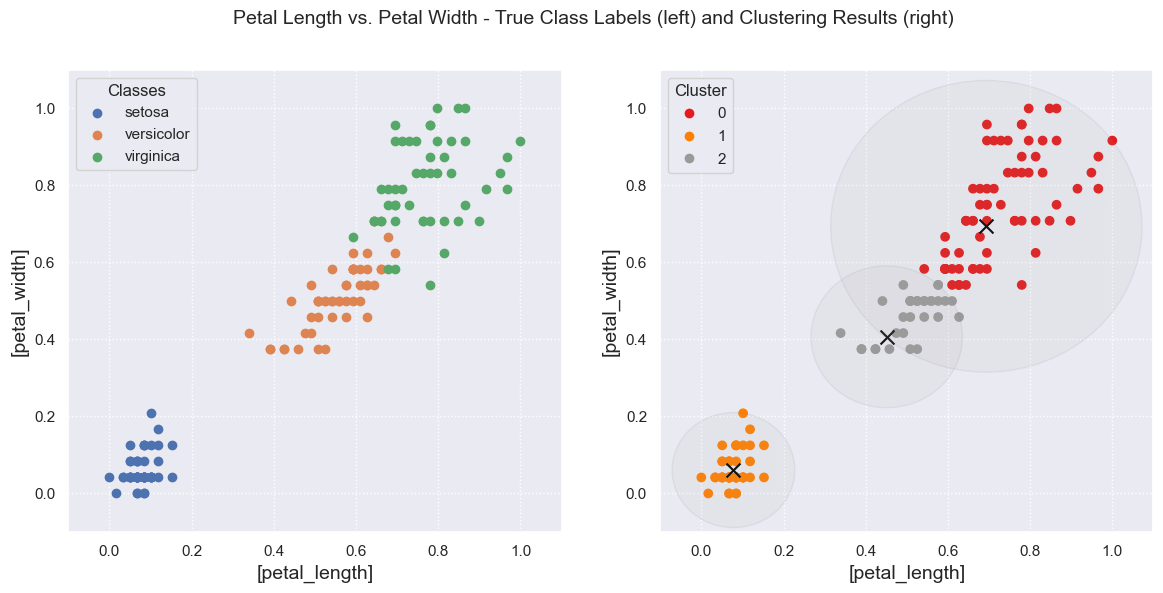

In [28]:
# init the plot
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))

#### plot true iris class labels

# add grid
ax[0].grid(linestyle='dotted')

# iterate over distinct species
for species in np.unique(iris.target):
    
    # obtain iris petal length and petal width
    iris_features = iris_data_norm[iris.target == species,:]
    
    # obtain iris species name
    iris_target_name = iris.target_names[species]
    
    # plot petal length vs. petal width as well as the true labels
    ax[0].scatter(iris_features[:,2], iris_features[:,3], c='C{}'.format(str(species)), label=iris_target_name)

# prepare data legend
ax[0].legend(loc='upper left', title='Classes')

# set axis range
ax[0].set_xlim([-0.1, 1.1])
ax[0].set_ylim([-0.1, 1.1])

# add axis legends
ax[0].set_xlabel("[petal_length]", fontsize=14)
ax[0].set_ylabel("[petal_width]", fontsize=14)

#### plot clustering results

# add grid
ax[1].grid(linestyle='dotted')

# plot petal length vs. petal width and corresponding classes
scatter = ax[1].scatter(iris_data_norm[:,2], iris_data_norm[:,3], c=labels.astype(np.int32), cmap=plt.cm.Set1)

# prepare data legend
ax[1].legend(*scatter.legend_elements(), loc='upper left', title='Cluster')

# plot cluster means
ax[1].scatter(means[:,0], means[:,1], marker='x', c='black', s=100)

# iterate over distinct cluster means
for i, mean in enumerate(means):
    
    # determine max cluster point distance
    cluster_radi = cdist(iris_data_norm[:, 2:4][labels==i], [mean]).max()
    
    # plot cluster size
    ax[1].add_patch(plt.Circle(mean, cluster_radi, fc='darkgrey', edgecolor='slategrey', lw=1, alpha=0.1, zorder=1))

# set axis range
ax[1].set_xlim([-0.1, 1.1])
ax[1].set_ylim([-0.1, 1.1])
    
# add axis legends
ax[1].set_xlabel("[petal_length]", fontsize=14)
ax[1].set_ylabel("[petal_width]", fontsize=14)

# add plot title
plt.suptitle('Petal Length vs. Petal Width - True Class Labels (left) and Clustering Results (right)', fontsize=14);

Für eine quantitative Evaluation möchten wir den Abstand aller Datensätze $x_{i}$ zu ihren nächsten Mittelwerten $\mu_{i}$ untersuchen. Erinnern wir uns daran, dass das k-Means Clustering eine lokale Optimierung der **Residual Sum of Squares (RSS)** durchführt, die wie nachfolgend definiert ist:

$$RSS = \sum_{i=1}^{n}(x_{i}-\mu_{k(i)})^{2},$$

wobei $x_{i}$ ein Sample des Datensatzes bezeichnet, und $\mu_{k(i)}$ den entsprechend am nächsten liegenden Mittelwert innerhalb des Feature Space $\mathcal{R}^{d}$. Nachfolgend möchten wir den RSS Wert für das vorliegende Clustering Ergebnis betrachten:

In [29]:
distances = kmeans.inertia_
print(distances)

2.8878814676899403


## Lab Aufgaben:

Im Ihr wissen zu vertiefen empfehlen wir, die nachfolgenden Übungen zu bearbeiten:

**1. Trainieren und evaluieren Sie den k Means-Clustering Algorithmus für eine unterschiedliche Anzahl max. Iterationen.**

> Erhöhen Sie kontinuierlich die Anzahl der max. Iterationen $i$ des Trainings des k Means-Clustering. Beginnen sie mit einer Iteration und erhöhen Sie den Wert auf bis zu 5 Iterationen ($i=1, 2, ..., 5$). Führen Sie das Clustering pro unterschiedlichem Iterationswert durch. Was lässt sich in Bezug auf die Residual Sum of Squares (RSS) mit zunehmender Anzahl Iterationen $i$ beobachten? Bitte erläutern Sie Ihre Feststellungen.

In [30]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

**2. Bestimmen Sie, ob der k Means-Clustering Algorithmus immer zu einem gleichen Ergebnis konvergiert.**

> Überprüfen Sie sorgfältig die verschiedenen Schritte des k Means-Algorithmus. Beantworten Sie die Frage, ob der Algorithmus immer zu einem gleichen Ergebnis konvergiert? Bitte erläutern Sie Ihre Überlegungen.

In [31]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

**3. Anwendung des k Means-Clustering Algorithmus in unterschiedlichen Datenverteilungen.**

> Betrachten Sie die folgenden Datenverteilungen. Bestimmen Sie, welche sich für eine Anwendung des k Means-Clustering eignen. Bestimmen sie hierüber hinaus welcher $k$-Wert für das jeweilge Clustering verwendet werden sollte. Bitte erläutern Sie Ihre Überlegungen.

<img align="center" style="max-width: 600px; height: auto" src="clustering.png">

In [32]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

## 4. k Means-Clustering (continued)

### 4.1 Visualisierung des Feature Space

Sehen wir uns nun an, wie das **k-Means Clustering** in höherdimensionalen Merkmalsräumen angewandt werden kann. Unser Ziel ist es hierbei, die Klassen des Datensatzes anhand der drei nachfolgenden Merkmale zu ermitteln `Petal length (cm)`, `Petal width (cm)` und `Sepal length (cm)`. Hierzu verschaffen wir uns zunächst einen Eindruck über die Verteilung der Samples der drei Merkmale, indem wir sie entsprechend visualisieren.

Um die dreidimensionale Darstellung zu ermöglichen, laden wir die Bibliothek `matplotlib` neu und importieren ihre 3D-Darstellungsmöglichkeiten:

In [33]:
%matplotlib notebook
from importlib import reload
reload(plt)

# import the seaborn plotting library
import seaborn as sns

# import matplotlibs 3D plotting capabilities
from mpl_toolkits.mplot3d import Axes3D

Verschaffen wir uns nun einen Eindruck über die Verteilung der Samples der drei Merkmale, indem wir sie entsprechend visualisieren:

In [34]:
# init the plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# init 3D plotting
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)

# add grid
ax.grid(linestyle='dotted')

# plot petal length (3rd feature in the dataset) vs. petal width (4th feature in the dataset)
ax.scatter(iris_data_norm[:,0], iris_data_norm[:,1], iris_data_norm[:,2], s=40)

# add axis legends
ax.set_xlabel("[sepal_length]", fontsize=14)
ax.set_ylabel("[sepal_width]", fontsize=14)
ax.set_zlabel("[petal_length]", fontsize=14)

# add plot title
plt.title('Sepal Length vs. Sepal Width vs. Petal Length', fontsize=14)

# show the 3-dimensional plot
plt.show();

<IPython.core.display.Javascript object>

### 4.2 Hyperparameter Definition

In einem ersten Schritt definieren wir wieder die **Anzahl der Cluster $k$**, die im Rahmen des Clustering erkannt werden sollen. Hierbei folgen wir implizit der Annahme, dass jede Iris Spezies einer uns unbekannten Verteilung entspricht (jede Verteilung mit anderem Mittelwert $\mu_1$, $\mu_2$ und $\mu_3$). Vor diesem Hintergrund setzen wir die Anzahl der zu erkennenden Cluster, entsprechend der Anzahl Iris Spezien, auf $k=3$:

In [35]:
no_clusters = 3

In einem zweite Schritt definieren wir die **initialen Koordinaten der Cluster Zentroide $\mu_{i}$**. Diese stellen die Ausgangspunkte der Zentroide in der ersten Iteration des k Means-Clustering Verfahrens dar. In unserem Beispiel unserem definieren wir insgesamt 3 Koordinaten mit jeweils 3 Dimensionen. Dies vor dem Hintergrund, dass wir 3 Cluster auf der Grundlage der beiden Features `Sepal length (cm)`, `Sepal width (cm)`, und `Petal length (cm)` finden möchten:

In [36]:
init_means = np.array([[1.0, 3.0, 3.0], [2.0, 6.0, 5.0], [1.0, 7.0, 2.0]])

In einem dritten Schritt definieren wir auch wieder eine **maximale Anzahl von Iterationen**, welche der k Means-Clustering Algorithmus durchführen soll:

In [37]:
max_iterations = 10

### 4.3 Model Training

Nach Definition der Hyperparameter initialisieren nun den **k Means-Clustering** Algorithmus der [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) Bibliothek:

In [38]:
kmeans = KMeans(n_clusters=no_clusters, init=init_means, max_iter=max_iterations)

In einem nächsten Schritt, trainieren wir das Clustering auf Grundlage der Feature `Sepal length (cm)`, `Sepal width (cm)`, und `Petal length (cm)` des Datensatzes:

In [39]:
kmeans.fit(iris_data_norm[:,0:3]) # note that we are using column 1 (sepal length), 2 (sepal width) and 3 (petal length) 

KMeans(init=array([[1., 3., 3.],
       [2., 6., 5.],
       [1., 7., 2.]]),
       max_iter=10, n_clusters=3)

Nach erfolgreichem Training, werfen wir nun wieder einen Blick auf die gelernten Klassenlabels:

In [40]:
labels = kmeans.labels_ # obtain the assigned cluster labels
print(labels)           # print the cluster labels

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


Darüber hinaus möchten wir auch einen Blick die gelernten Zentroide werfen:

In [41]:
means = kmeans.cluster_centers_ # obtain the assigned cluster means 
print(means)                    # print the cluster center coordinates

[[0.69270833 0.44965278 0.76129944]
 [0.40865385 0.28365385 0.57040417]
 [0.19611111 0.595      0.07830508]]


### 4.4 Model Evaluation

In einem nächsten Schritt möchten wir nun erneut die Güte des erlernten Modell's qualitativ und auch quantitativ evaluieren. Hierzu visualisieren wir zunächst die Samples auf Grundlage der beiden Features `Sepal length (cm)`, `Sepal width (cm)` und `Petal length (cm)` und die Positionen der Cluster Zentriode:

In [42]:
# init the plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# init 3D plotting
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)

# add grid
ax.grid(linestyle='dotted')

# plot petal length vs. petal width and corresponding classes
ax.scatter(iris_data_norm[:,0], iris_data_norm[:,1], iris_data_norm[:,2], c=labels.astype(np.int32), cmap=plt.cm.Set1, s=40)

# plot cluster means
ax.scatter(means[:,0], means[:,1], means[:,2], marker='x', c='black', s=100)

# add axis legends
ax.set_xlabel("[sepal_length]", fontsize=14)
ax.set_ylabel("[sepal_width]", fontsize=14)
ax.set_zlabel("[petal_length]", fontsize=14)

# add plot title
plt.title('Sepal Length vs. Sepal Width vs. Petal Length', fontsize=14);

# show the 3-dimensional plot
plt.show();

<IPython.core.display.Javascript object>

Nachfolgend möchten wir, für eine quantitative Beurteilung, den RSS Wert für das vorliegende Clustering Ergebnis betrachten:

In [43]:
distances = kmeans.inertia_
print(distances)

5.3205319690887


### 4.5 Herausforderungen des Algorithmus 

Obwohl der **k Means-Clustering** Algorithmus einer der beliebtesten Clustering-Algorithmen für das maschinelle Lernen darstellt hat er drei wesentliche Nachteile, die im Folgenden erläutert werden:

1. Das k Means-Clustering garantiert, dass sich das Klassifikationsergebnis mit jeder Iteration verbessert. Insgesamt gibt es jedoch **keine Garantie**, dass der Algorithmus die **global besten Cluster** findet.

**Praktische Lösung:** Durchführung des Algorithmus mit mehreren zufälligen Initialisierungen der Zentroide. Eine solch zufällige Initialisierung geschieht auch standardmäßig bei der Verwendung der `scikit` learn Implementierung des Algorithmus.

2. Das k Means-Clustering ermöglicht nicht die Bestimmung einer **optimale Anzahl von Clustern** bzw. kann dies nicht aus den bereitgestellten Daten lernen. D.h. bei Ausführung des Algorithmus mit $k=20$ resultiert in 20 gefunden Clustern unabhängig davon wie sinnvoll diese Ergebnis ist. 

**Praktische Lösung:** Verwenden der sog. "Elbow"-Technik, wie im nächsten Abschnitt des Notebooks erläutert. Eine andere Möglichkeit besteht in der Anwendung von komplexeren Clustering Algorithmus wie z.B. Gaussian Mixture Models oder dem DBSCAN Algorithmus.

3. Das k Means-Clustering resultiert im Fall **nicht linear trennbarer** Klassen innerhalb des Feature Space zu suboptimalen Ergebnissen. Dies resultiert aus der Annahme, dass Samples jeweils den nächsten liegenden Zentroid zugeordnet werden.

**Praktische Lösung:** Transformation (d.h. wenn möglich) des Datensatzes in eine höhere Dimension, in der eine lineare Trennung möglich wird, z. B. durch Verwendung eines spektralen Clustering-Algorithmus.

## 5. Model Optimierung

Eine der grundlegenden Ideen der Optimierung unüberwachter maschineller Lernverfahren, wie dem **k Means-Clustering** Algorithmus, besteht darin, eine optimale Anzahl von Cluster zu finden. Diese Zielsetzung kann durch die Analyse der **Residual Sum of Squares (RSS)** (Gesamtsumme der quadrierten Abstände) für unterschiedliche Cluster Anzahl Konfigurationen erreicht werden:

$$k^{*} =\underset{k}{\arg \min} \sum_{i=1}^{n}(x_{i}-\mu_{k(i)})^{2},$$

hierbei bezeichnet $x_{i}$ einen einzelnen Merkmalsvektor (oder eine Beobachtung) des Datensatz und $\mu_{k(i)}$ den nächstliegenden Mittelwert im Merkmalsraum $\mathcal{R}^{d}$. Die Herausforderung besteht nun darin, eine optimale Anzahl Cluster $k$ für einen gegebenen Datensatz zu ermitteln? Die Auswahl des optimalen $k$ ist mit den beiden nachfolgenden assoziiert:

- Die Cluster Anzahl $k$ ist zu niedrig (Untersegmentierung), dies hat sehr heterogene Cluster zur Folge.
- Die Cluster Anzahl $k$ ist zu hoch (Übersegmentierung), dies hat sehr feinkörnige Cluster zur Folge. 

Beispiele für Unter. bzw. Übersegmentierung: 

<img align="center" style="max-width: 800px; height: auto" src="kselection.png">

Lösung: Verwenden der **Residual Sum of Squares (RSS)** Metrik, um eine optimale Anzahl von Clustern $k$ zu finden. Dies kann durch die Ausführung des sogenannten **'Elbow'** Verfahrens erreicht werden, die durch den folgenden Algorithmus definiert ist:

>- **Schritt 1** - Berechnen des k Means-Clustering für unterschiedliche $k$ Konfigurationen.
>- **Schritt 2** - Berechnen der RSS $k$ für die unterschiedlichen $k$ Konfigurationen.
>- **Schritt 3** - Abtragen der RSS für jede $k$ Konfiguration in einem Schaubild. 
>- **Schritt 4** - Ermittlung des 'Elbow' der Verteilung der RSS für unterschiedliche $k$ Werte.

In einem nächsten Schritt verwenden wir das **Elbow** Verfahrens um eine optimale Cluster Anzahl für den Iris Datensatz zu ermitteln. Hierzu führen wir einen Grid-Search über den Hyperparameter $k$ des k Means-Clustering Algorithmus durch. Um einen solchen Grid-Search effizient auszuführen begrenzen wir die Anzahl der Iteration pro Ausführung eines Clusterings:

In [44]:
max_iterations = 100

Anschliessend führen wir den Grid-Search mit $k=1, 2, ..., 30$ Werten durch:

In [45]:
# init the list of squared distances
sum_of_squared_distances = []

# define the range of k-values to investigate
K = range(1,30)

# iterate over all k-values
for k in K:
    
    # init the k-Means clustering algorithm of the current k-value
    kmeans = KMeans(n_clusters=k, init='random', max_iter=max_iterations)
    
    # run the k-Means clustering of sepal-length and sepal-width features
    kmeans = kmeans.fit(iris_data_norm[:,0:2])
    
    # collect the sum of within squared distances of the current k-value
    sum_of_squared_distances.append(kmeans.inertia_)

Nach Beendigung des Grid-Search wollen wir die berechneten RSS für verschieden evaluieren: 

In [46]:
# print the collected sum of squared distances of each k
sum_of_squared_distances

[12.797757201646089,
 6.855290526033279,
 4.115194202754065,
 3.217483856523378,
 2.560506862141699,
 2.1000615705604577,
 1.9029722069726374,
 1.5626338195969722,
 1.3690066282106972,
 1.1328192745076424,
 0.9700998033283481,
 0.8481667039979279,
 0.7739561539636428,
 0.8050063089559616,
 0.7021129619543287,
 0.6332509118967453,
 0.6134045307294728,
 0.5560502271005743,
 0.5397167566872427,
 0.5330673360229796,
 0.46690139742801784,
 0.44809495572089986,
 0.4364779296492258,
 0.40874592764060386,
 0.3859107081618655,
 0.39103711440951033,
 0.35639592906664647,
 0.3529917297423084,
 0.33035454022143834]

In einem letzten Schritt stellen wir die Verteilung der RSS für unterschiedliche $k$ Werte in einem Diagramm dar. Die Darstellung innerhalb eines solchen Diagramms ermöglicht die Bestimmung des 'Elbow' der Verteilung:

In [47]:
# init the plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot petal length (3rd feature in the dataset) vs. petal width (4th feature in the dataset)
ax.plot(K, sum_of_squared_distances)

# add axis legends
ax.set_xlabel("[number of clusters $k$]", fontsize=14)
ax.set_ylabel("[within-cluster distance $E$]", fontsize=14)

# add plot title
plt.title('Cluster Number $k$ vs. Within-Cluster Distance $E$', fontsize=14);

<IPython.core.display.Javascript object>

## Lab Aufgaben:

Im Ihr wissen zu vertiefen empfehlen wir, die nachfolgenden Übungen zu bearbeiten:

**1. Wenden Sie den k Means-Clustering Algorithmus auf alle vier im Iris-Datensatz enthaltenen Merkmale an.**

> Wenden Sie das k Means Clustering an, um ein $k=3$ Clustering der vier im Iris-Datensatz enthaltenen Merkmale `Sepal-Länge (cm)`, `Sepal-Breite (cm)`, `Petal-Länge (cm)` und `Petal-Breite (cm)` durchzuführen.

In [48]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

**2. Bestimmung der optimalen Cluster Anzahl $k$ bei Verwendung der der vier im Iris-Datensatz enthaltenen Merkmale.**

> Bestimmen Sie eine optimale Anzahl Cluster $k$, unter Verwendung der oben beschriebenen **'Elbow'** Methodik für das Clustering des Iris Datensatzes unter Verwendung der vier im Iris-Datensatz enthaltenen Merkmale `Sepal-Länge (cm)`, `Sepal-Breite (cm)`, `Petal-Länge (cm)` und `Petal-Breite (cm)`.

In [49]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

## Lab Zusammenfassung

Dieses Notebook umfasste eine schrittweise Einführung in einige grundlegende Konzepte eines **Unsupervised Machine Learning** Prozesses in Jupyter Notebooks. Die vorgestellten Code Beispiele und die Übungen können als Ausgangspunkt für komplexere und Ihre massgeschneiderten Analysen dienen.